In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch    # Plotting dendogram
from sklearn.cluster import AgglomerativeClustering    # to do segmentation
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
airlinedata=pd.read_excel("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/7_Clustering/EastWestAirlines.xlsx", sheet_name="data")
airlinedata.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Pre-processing

In [3]:
airlinedata.shape

(3999, 12)

In [4]:
airlinedata.info

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [5]:
airlinedata.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
# we will drop both columns named ID# and Award?,as it will not much contribute in clustering process.

airlinedata = airlinedata.drop(['ID#','Award?'], axis=1)
airlinedata.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [7]:
## Let's find correlation
airlinedata.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


### Visualization of data

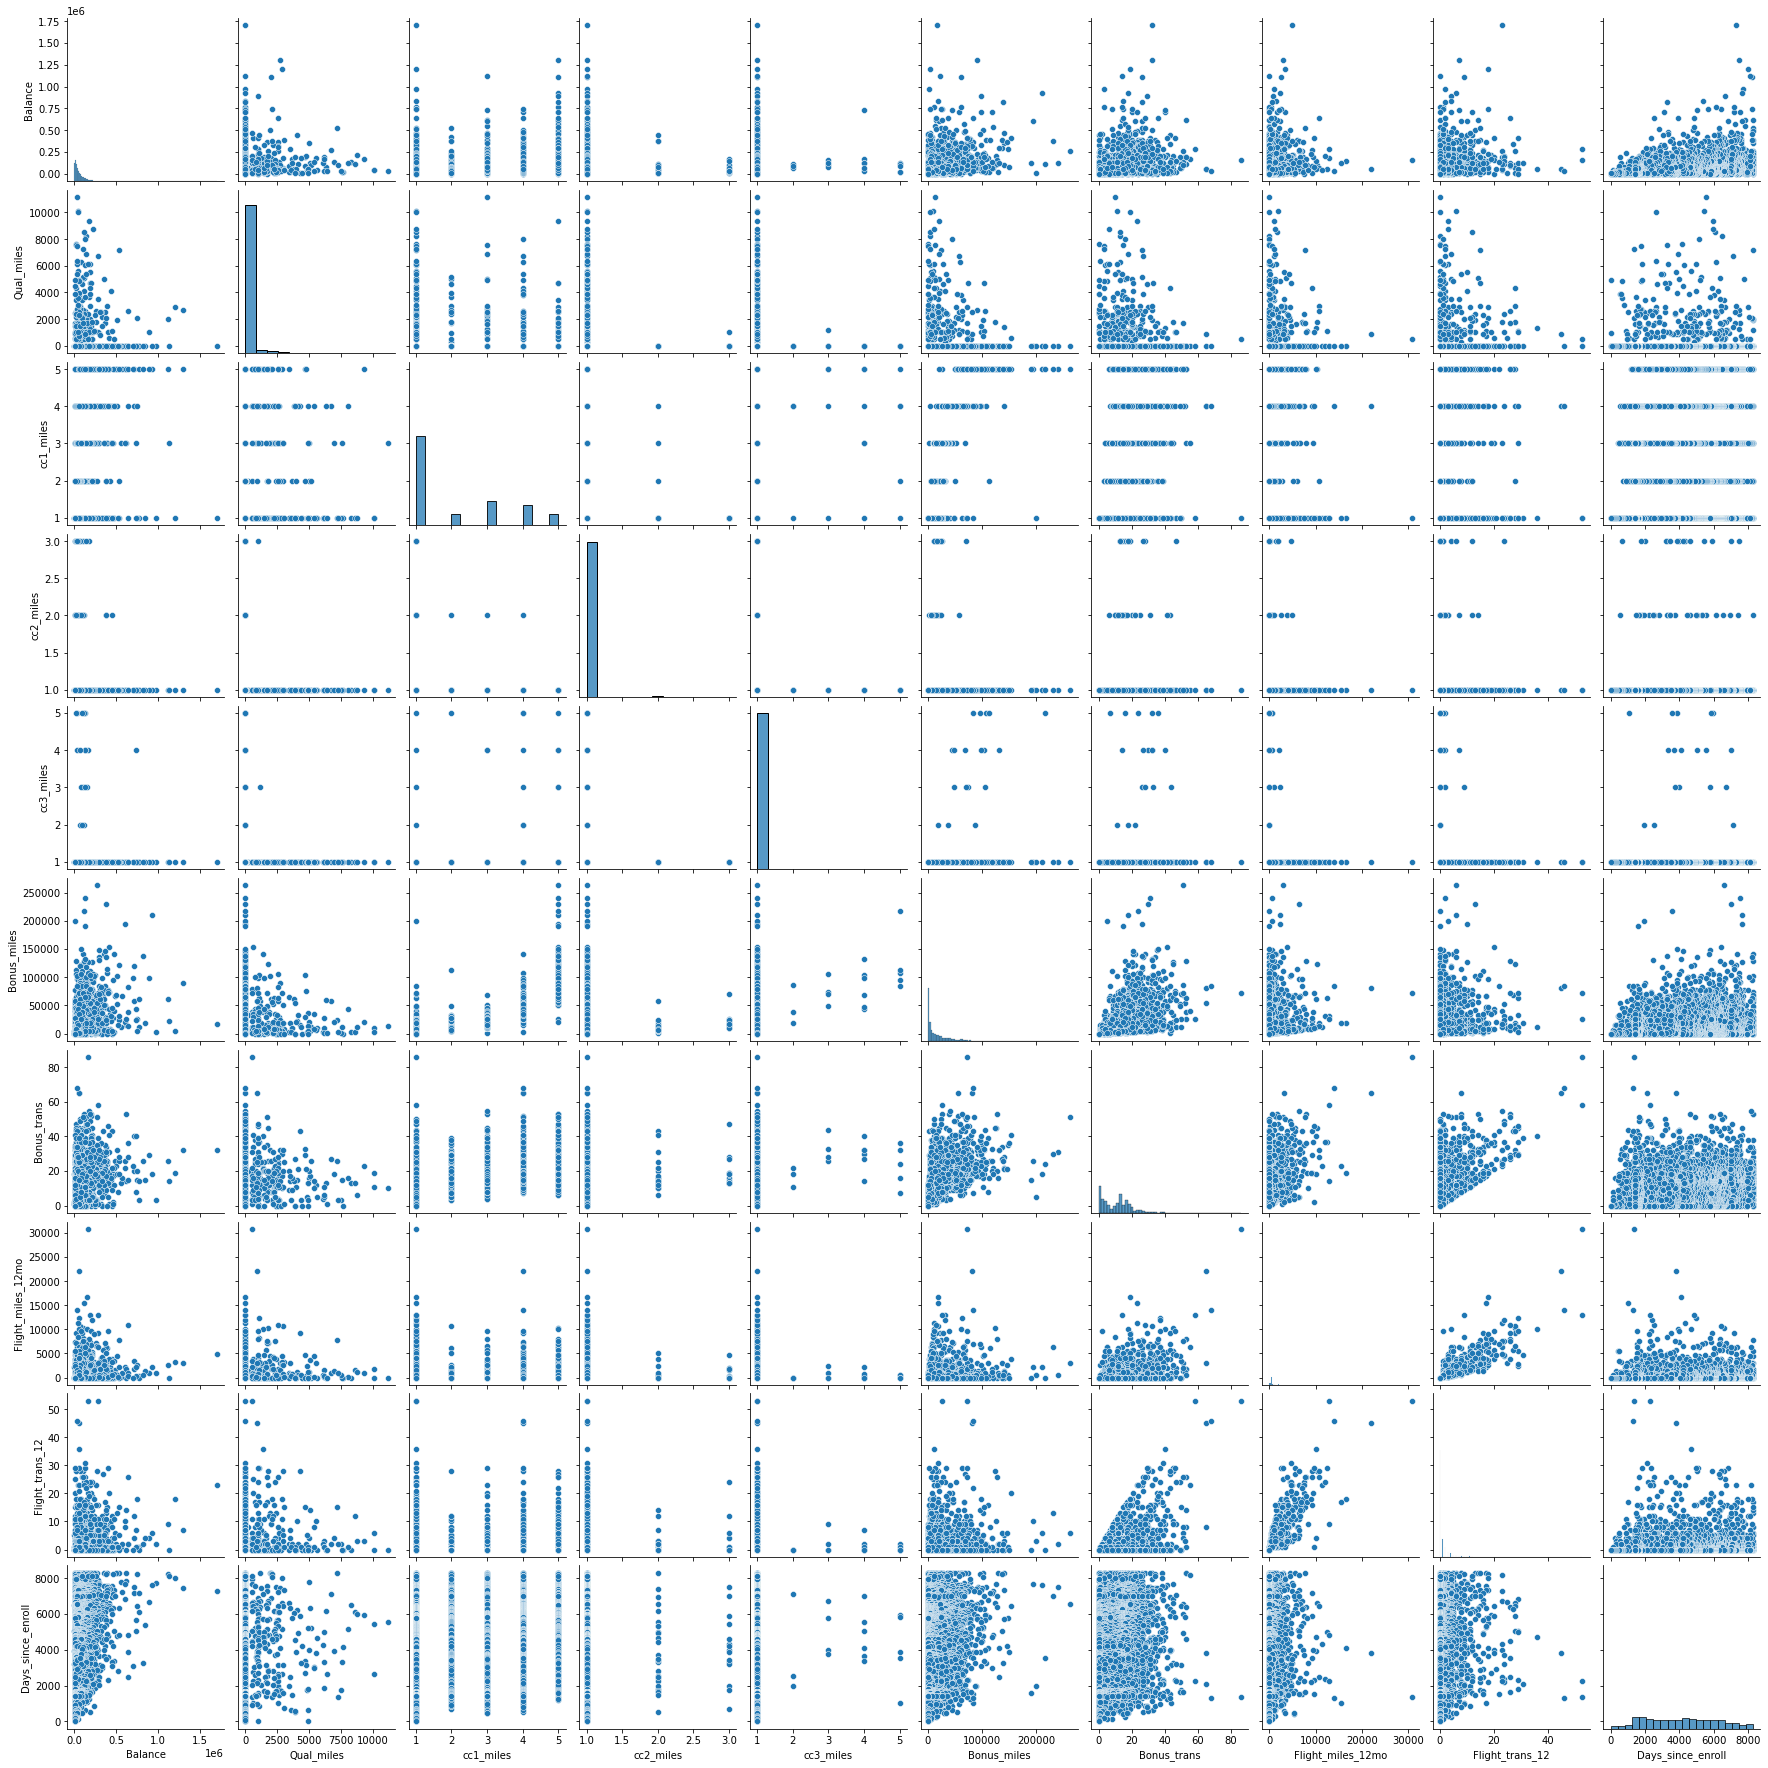

In [8]:
sns.pairplot(airlinedata)

### Hierarchical Clustering

In [9]:
#Standardizing the DataFrame
scaler  = StandardScaler()
scaler_df = scaler.fit_transform(airlinedata.iloc[:,1:])

#Normalize the DataFrame
df_norm = normalize(scaler_df)

df_norm = pd.DataFrame(df_norm,columns=airlinedata.columns[1:])
df_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.087436,-0.361187,-0.046108,-0.029458,-0.329839,-0.518171,-0.154224,-0.169977,0.654930
1,-0.090100,-0.372192,-0.047513,-0.030356,-0.339068,-0.483595,-0.158923,-0.175156,0.667390
2,-0.095686,-0.395269,-0.050459,-0.032238,-0.276969,-0.406605,-0.168776,-0.186016,0.725186
3,-0.088247,-0.364540,-0.046536,-0.029732,-0.326506,-0.522982,-0.155655,-0.171554,0.649998
4,-0.061656,0.466465,-0.032513,-0.020773,0.358459,0.496225,0.382225,0.229180,0.451408


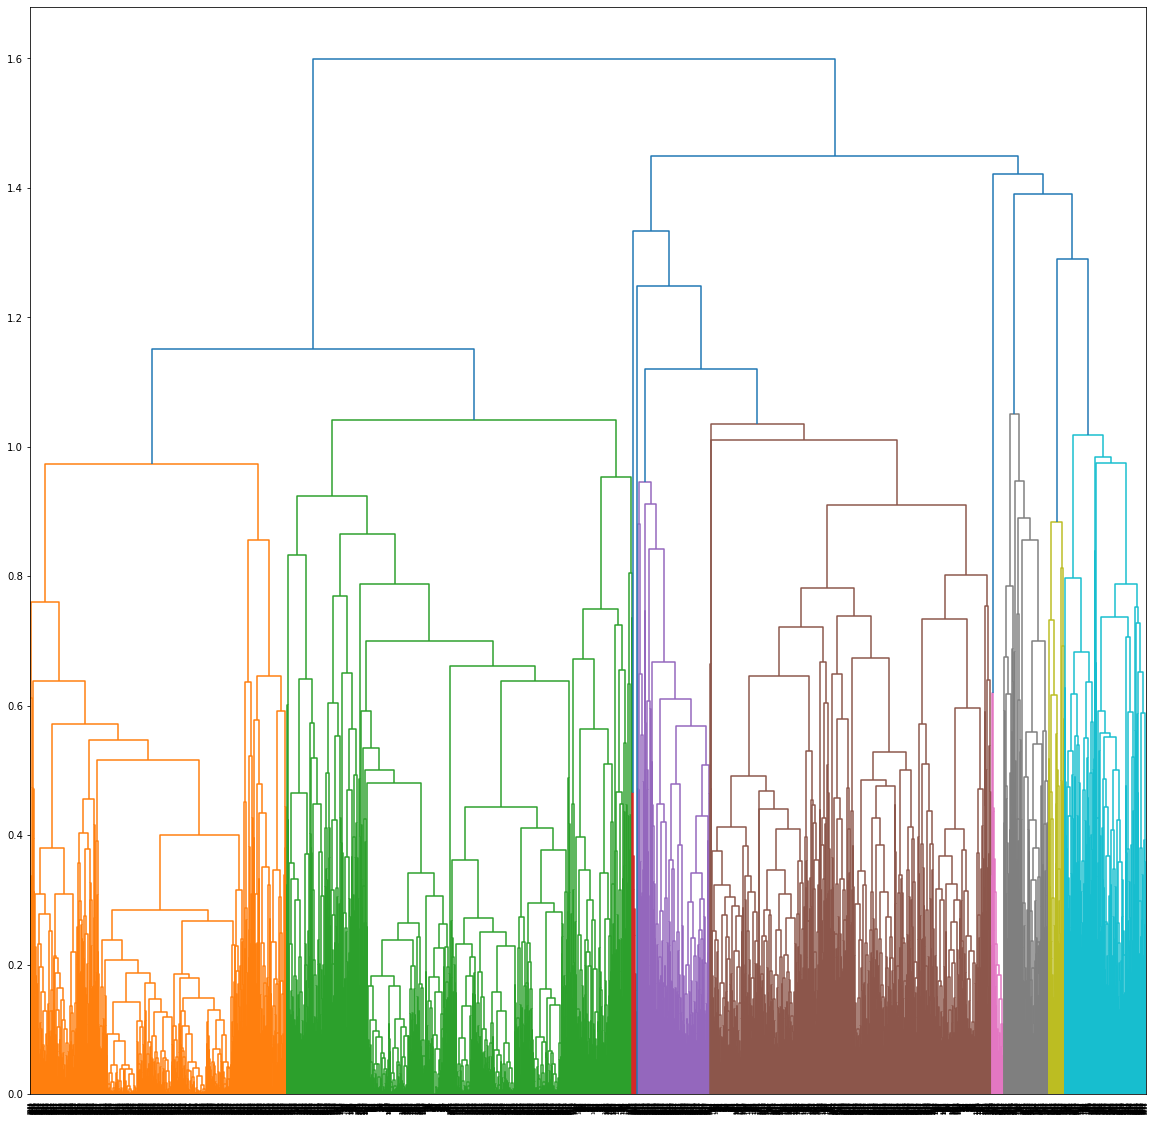

In [10]:
# create dendrogram
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [11]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

In [12]:
clusters = hc.fit_predict(df_norm)

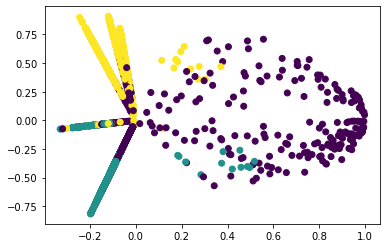

In [13]:
plt.scatter(df_norm["Qual_miles"],df_norm["cc1_miles"] , c=clusters)

In [14]:
clusters

array([1, 1, 1, ..., 2, 1, 1], dtype=int64)

In [15]:
airlinedata["h_cluster_id"] = hc.labels_

In [16]:
airlinedata.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,2


### K-Means Clustering

In [17]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

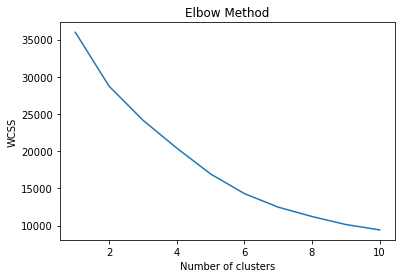

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
clusters_new = KMeans(6, random_state=42)
clusters_new.fit(scaler_df)

KMeans(n_clusters=6, random_state=42)

In [20]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
#Assign clusters to the data set
airlinedata['clusterid_new'] = clusters_new.labels_

In [22]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-1.15599334e-01,  1.19952751e+00, -9.82418871e-02,
        -5.50751061e-02,  8.74739762e-01,  7.40951353e-01,
        -1.05778354e-01, -1.14339039e-01,  3.18171553e-01],
       [-1.19916069e-01, -6.62550043e-01, -9.82418871e-02,
        -6.06463309e-02, -5.38521352e-01, -5.30398370e-01,
        -1.68597694e-01, -1.81553296e-01, -1.86952871e-01],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01],
       [ 3.73982165e-01,  1.23562813e-01, -9.82418871e-02,
        -6.27665798e-02,  6.47767259e-01,  1.76166885e+00,
         3.87884984e+00,  4.13966000e+00,  2.61651336e-01],
       [ 6.91711323e+00, -5.65880291e-03, -9.82418871e-02,
        -6.27665798e-02,  8.86531526e-02,  7.55717217e-02,
         3.50345726e-01,  3.74274463e-01, -1.36748982e-01],
       [-1.56235600e-01, -6.68227273e-01,  9.03825361e+00,
        -6.27665798e-02, -1.01665326e-01,  6.178511

In [23]:
airlinedata.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_cluster_id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,110752.275526,54.690691,3.710961,1.000000,1.001502,38268.016517,18.716967,311.962462,0.939940,4775.544294,1.813814
1,1,46658.196606,51.351407,1.147351,1.000000,1.000414,4140.660596,6.508692,224.013245,0.685017,3732.524834,0.946606
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,2.000000
3,3,166605.785185,433.414815,2.229630,1.000000,1.000000,32787.096296,28.518519,5890.577778,17.074074,4658.837037,0.014815
4,4,113087.586207,5494.965517,2.051724,1.000000,1.000000,19285.637931,12.327586,950.551724,2.793103,3836.189655,0.000000
5,5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.000000


In [24]:
airlinedata

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_cluster_id,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,1,1
1,19244,0,1,1,1,215,2,0,0,6968,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,1,1
3,14776,0,1,1,1,500,1,0,0,6952,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,1,1


### DBSCAN Algorithm

In [25]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(df_norm)

DBSCAN(eps=5)

In [26]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [28]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [29]:
pd.concat([airlinedata,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_cluster_id,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1,1,0
1,19244,0,1,1,1,215,2,0,0,6968,1,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,1,1,0
3,14776,0,1,1,1,500,1,0,0,6952,1,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,1,1,0
